In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def getDf():
    files = {}
    for size in [3760000, 3770000, 3780000]:
        with open("../result/resultRustRc_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]

    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        dfs[k] = df
    data = dfs['size3760000']
    for s in [3770000, 3780000]:
        data = pd.concat([data, dfs["size{}".format(s)]])
    data = data.astype({"datastructure": str, "size": int, "field": str, "createtime":int,  \
                        'accesstime': int, "droptime": int, "totaltime": int})
    return data

In [11]:
df = getDf()

In [12]:
df_avg = df.groupby(["size", "field"]).mean().reset_index()

In [13]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)

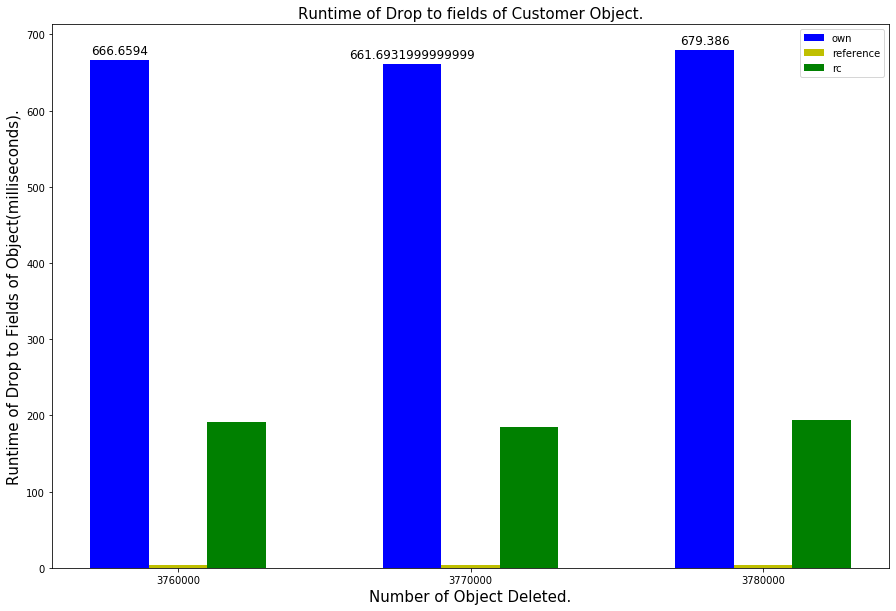

In [14]:
own = df_avg[df_avg["field"] == '"own"']
reference = df_avg[df_avg["field"] == '"reference"']
rc = df_avg[df_avg["field"] == '"rc"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w, own["droptime"] / 1000, width = w, color ='b', align = 'center')
b2 = ax.bar(idx , reference["droptime"] / 1000, width = w, color ='y', align = 'center')
b3 = ax.bar(idx + w, rc["droptime"] / 1000, width = w, color ='g', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels(label)
ax.set_xlabel("Number of Object Deleted.", fontsize = 15)
ax.set_ylabel("Runtime of Drop to Fields of Object(milliseconds).", fontsize = 15)
ax.set_title("Runtime of Drop to fields of Customer Object.", fontsize = 15)
autolabel(b1, ax)
ax.legend((b1, b2, b3), ("own", "reference", "rc"))
#ax.set_yscale('log')
#fig.savefig("rust_different_insertion_noinit.eps")
#fig.savefig("rust_borrowing.png")
plt.show()

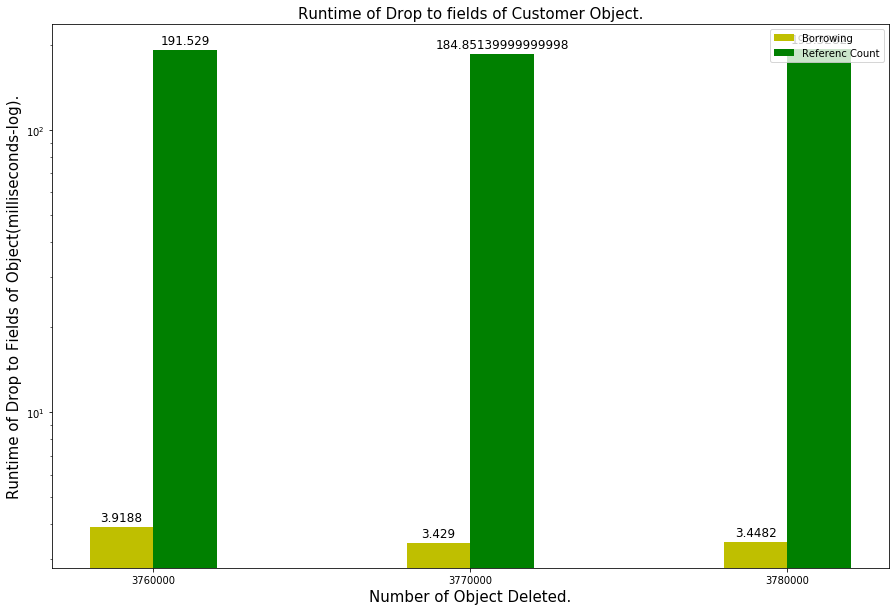

In [15]:
reference = df_avg[df_avg["field"] == '"reference"']
rc = df_avg[df_avg["field"] == '"rc"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w / 2 , reference["droptime"] / 1000, width = w, color ='y', align = 'center')
b2 = ax.bar(idx + w / 2, rc["droptime"] / 1000, width = w, color ='g', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels(label)
ax.set_xlabel("Number of Object Deleted.", fontsize = 15)
ax.set_ylabel("Runtime of Drop to Fields of Object(milliseconds-log).", fontsize = 15)
ax.set_title("Runtime of Drop to fields of Customer Object.", fontsize = 15)
ax.legend((b1, b2), ("Borrowing", "Referenc Count"))
ax.set_yscale('log')
autolabel(b1, ax)
autolabel(b2, ax)

#fig.savefig("rust_different_insertion_noinit.eps")
#fig.savefig("rust_borrowing.png")
plt.show()

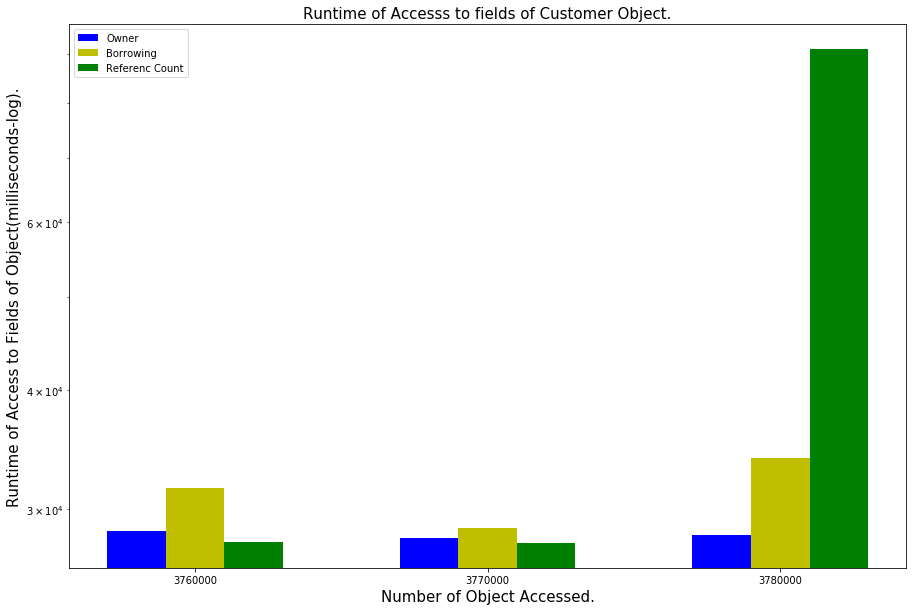

In [8]:
own = df_avg[df_avg["field"] == '"own"']
reference = df_avg[df_avg["field"] == '"reference"']
rc = df_avg[df_avg["field"] == '"rc"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w, own["accesstime"] / 1000, width = w, color ='b', align = 'center')
b2 = ax.bar(idx , reference["accesstime"] / 1000, width = w, color ='y', align = 'center')
b3 = ax.bar(idx + w, rc["accesstime"] / 1000, width = w, color ='g', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels(label)
ax.set_xlabel("Number of Object Accessed.", fontsize = 15)
ax.set_ylabel("Runtime of Access to Fields of Object(milliseconds-log).", fontsize = 15)
ax.set_title("Runtime of Accesss to fields of Customer Object.", fontsize = 15)
ax.legend((b1, b2, b3), ("Owner", "Borrowing", "Referenc Count"))
ax.set_yscale('log')
#fig.savefig("rust_different_insertion_noinit.eps")
#fig.savefig("rust_borrowing.png")
plt.show()